## Домашнее задание по теме "Деревья решений"

In [79]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [80]:
from sklearn.datasets import load_boston

In [444]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [445]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [446]:
data.shape

(506, 14)

In [447]:
# Для начала построим регрессию по всем признакам
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']

In [448]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 )  

In [449]:
# Выполним обучение модели без оптимизации параметров. Score составит 75%
clf_0 = DecisionTreeRegressor(random_state = 2042)
clf_0.fit(X_train, y_train)
score_0 = clf_0.score(X_test, y_test)
score_0

0.7509462864686356

In [385]:
# Функция, которая подбирает оптимальное количество наблюдений в листах по величине Score на тестовой выборке
def min_leaf(l):
    print("{:4} {}   {} ".format("#","l","score_max"))
    print("-"*16)
    score_max, i_min = 0,1
    for i in range(0,len(l)):
        clf = DecisionTreeRegressor(min_samples_leaf = l[i], random_state = 2042)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(f"{i}. {l[i]}   {score:.2f} ")
        if score_max < score:
            score_max, i_min = score, i
    print(f'Количество объектов в листе:{l[i_min]}')

In [386]:
l = [1,2,3,4,5,6,7,8,9,10]

In [387]:
min_leaf(l)

#    l   score_max 
----------------
0. 1   0.75 
1. 2   0.73 
2. 3   0.83 
3. 4   0.81 
4. 5   0.77 
5. 6   0.77 
6. 7   0.79 
7. 8   0.78 
8. 9   0.79 
9. 10   0.77 
Количество объектов в листе:3


In [388]:
# Функция, которая подбирает оптимальную глубину дерева по величине Score на тестовой выборке
def max_depth(l):
    print("{:4} {}   {} ".format("#","l","max_score"))
    print("-"*16)
    max_score, i_max = 0,1
    for i in range(0,len(l)):
        clf = DecisionTreeRegressor(max_depth=l[i], min_samples_leaf = 3, random_state = 2042)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(f"{i}. {l[i]}   {score:.4f} ")
        if max_score < score:
            max_score, i_max = score, i
    print(f'Глубина дерева:{l[i_max]}')

In [389]:
max_depth(l)

#    l   max_score 
----------------
0. 1   0.4159 
1. 2   0.6758 
2. 3   0.7717 
3. 4   0.8138 
4. 5   0.8486 
5. 6   0.8483 
6. 7   0.8596 
7. 8   0.8544 
8. 9   0.8462 
9. 10   0.8334 
Глубина дерева:7


In [391]:
# без оптимизации параметров Score на тестовой выборке получается 86.96%
clf = DecisionTreeRegressor(max_depth=7, min_samples_leaf = 3, random_state = 2042)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8595772448292118

In [362]:
from sklearn.model_selection import RandomizedSearchCV

In [402]:
# также попробуем подобрать параметры встроенными средствами
rms = RandomizedSearchCV(DecisionTreeRegressor(random_state = 2042), {'max_depth':l, 'min_samples_leaf': l}).fit(X_train, y_train)

In [403]:
rms.best_params_

{'min_samples_leaf': 8, 'max_depth': 9}

In [404]:
# вручную параметры подобрались лучше
rms.best_score_

0.7135855448738253

([<matplotlib.axis.YTick at 0x2c5feaf50d0>,
 [Text(0, 0, 'CRIM'),
  Text(0, 1, 'ZN'),
  Text(0, 2, 'INDUS'),
  Text(0, 3, 'CHAS'),
  Text(0, 4, 'NOX'),
  Text(0, 5, 'RM'),
  Text(0, 6, 'AGE'),
  Text(0, 7, 'DIS'),
  Text(0, 8, 'RAD'),
  Text(0, 9, 'TAX'),
  Text(0, 10, 'PTRATIO'),
  Text(0, 11, 'B'),
  Text(0, 12, 'LSTAT')])

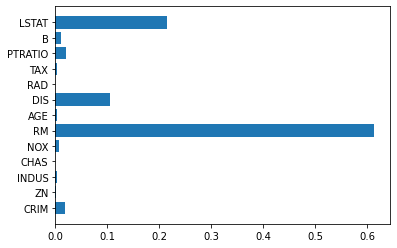

In [405]:
# проведем отбор признаков
plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X.columns)),X.columns)

In [451]:
# оставим 5 наиболее значимых признаков
features = ['LSTAT', 'RM', 'DIS', 'CRIM', 'NOX']

In [452]:
X = data[features]

In [453]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42 )  

In [454]:
min_leaf(l)

#    l   score_max 
----------------
0. 1   0.83 
1. 2   0.83 
2. 3   0.85 
3. 4   0.85 
4. 5   0.78 
5. 6   0.79 
6. 7   0.80 
7. 8   0.78 
8. 9   0.78 
9. 10   0.77 
Количество объектов в листе:3


In [455]:
max_depth(l)

#    l   max_score 
----------------
0. 1   0.4159 
1. 2   0.6758 
2. 3   0.7747 
3. 4   0.8287 
4. 5   0.8635 
5. 6   0.8643 
6. 7   0.8634 
7. 8   0.8648 
8. 9   0.8636 
9. 10   0.8591 
Глубина дерева:8


In [457]:
# в результате оптимизации параметров глубина дерева увеличилась на 1 уровень
clf = DecisionTreeRegressor(max_depth=8, min_samples_leaf = 3, random_state = 42)
clf.fit(X_train, y_train)
score_1 = clf.score(X_test, y_test)
score_1

0.8681604976082107

In [466]:
# общий прирост Score составил 11.72%
score_gain = (score_1 - score_0)
print('прирост score на тестовой выборке составил {0:.0%}'.format(score_gain))

прирост score на тестовой выборке составил 12%


In [467]:
# визуализируем дерево
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [468]:
get_tree_dot_view(clf, features, y)

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="RM <= 6.941\nmse = 87.897\nsamples = 354\nvalue = 23.016", fillcolor="#f5d0b5"] ;
1 [label="LSTAT <= 14.4\nmse = 41.295\nsamples = 292\nvalue = 20.084", fillcolor="#f7d9c3"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="DIS <= 1.385\nmse = 26.114\nsamples = 178\nvalue = 23.47", fillcolor="#f5cfb3"] ;
1 -> 2 ;
3 [label="mse = 91.577\nsamples = 4\nvalue = 44.475", fillcolor="#e89152"] ;
2 -> 3 ;
4 [label="RM <= 6.543\nmse = 14.233\nsamples = 174\nvalue = 22.987", fillcolor="#f5d0b5"] ;
2 -> 4 ;
5 [label="LSTAT <= 7.76\nmse = 7.174\nsamples = 133\nvalue = 21.639", fillcolor="#f6d4bb"] ;
4 -> 5 ;
6 [label="LSTAT <= 5.59\nmse = 2.279\nsamples = 25\nvalue = 23.776", fillcolor="#f5ceb2"] ;
5 -> 6 ;
7 [label="NOX <= 0.435\nmse = 3.409\nsamples = 6\nvalue = 25.45", fillcolor="#f4c9aa"] ;
6 -> 7 ;
8 [label="mse = 0.327\nsamples = 3\nvalue = 24.0", fillcolor="#f5cdb1"] ;
7 -> 8 ;
9 [label="mse =

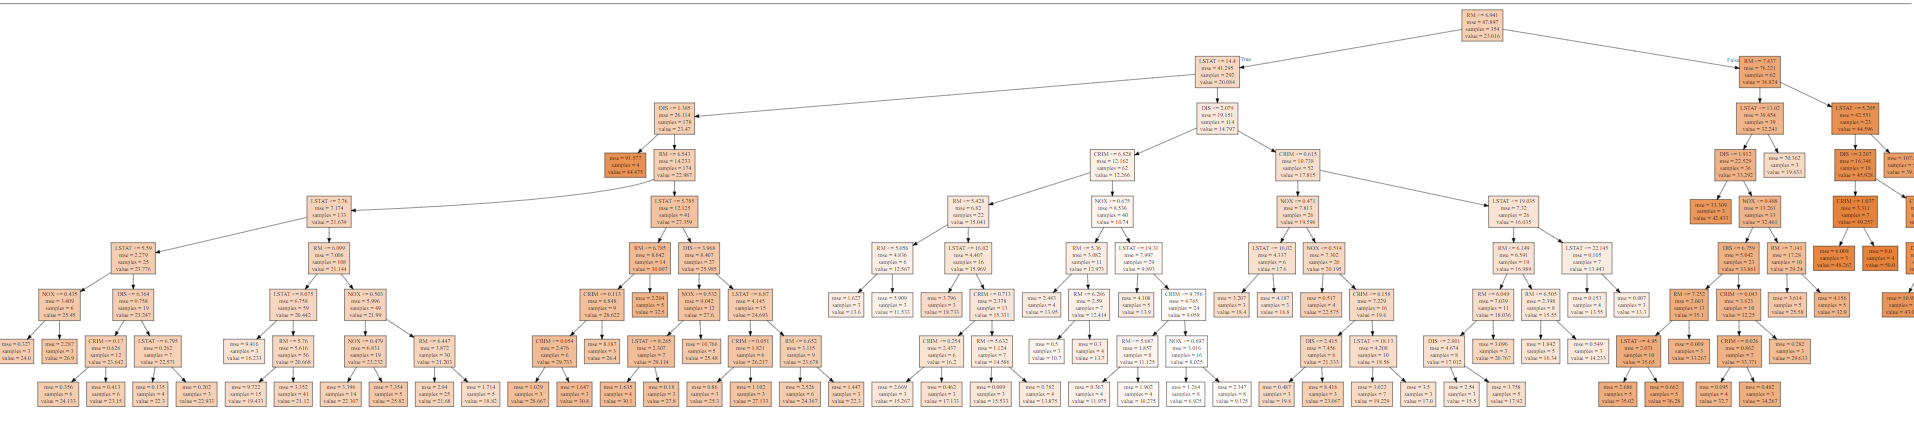